## Dataset and Problem Introduction

In this analysis, we explore the calculation of the Sharpe Ratio.

<p>In this notebook, the Sharpe ratio is calculated for the stocks Facebook and Amazon, with the S&amp;P 500 acting as the risk-free rate to benchmark the portfolio.</p>

Data Sources: 
* <b>Facebook</b>
<br>https://finance.yahoo.com/quote/FB/history?period1=1451865600&period2=1483142400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

* <b>Amazon</b>
<br>https://finance.yahoo.com/quote/AMZN/history?period1=1451865600&period2=1483142400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

* <b>S&P500</b>
<br>https://finance.yahoo.com/quote/%5EGSPC/history?period1=1451865600&period2=1483142400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

<br>Reference: https://www.datacamp.com/

In [23]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()

## Initial observation
<p>How many observations and variables do we have in our datasets.</p>

In [25]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
stock_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [26]:
# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()


Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


## Plot of daily prices for stocks
<p>Visualisation of the 2 stocks.</p>

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


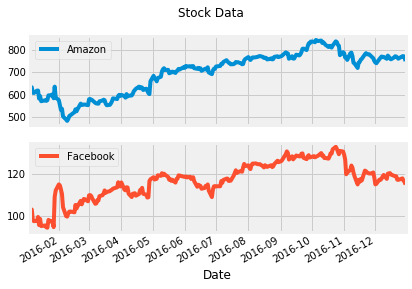

In [27]:
# visualize the stock_data
stock_data.plot(title='Stock Data', subplots=True);

# summarize the stock_data
stock_data.describe()

## Plot of daily values for benchmark
<p>Visualisation of the S&amp;P 500 benchmark.</p>

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


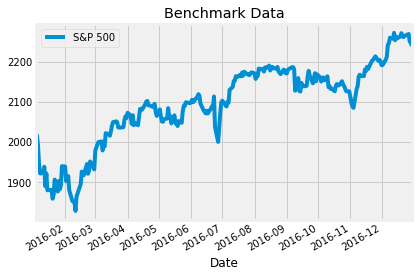

In [28]:
# plot the benchmark_data
benchmark_data.plot(title='Benchmark Data');

# summarize the benchmark_data
benchmark_data.describe()

## Sharpe ratio inputs
To calculate the Sharpe ration we need the return on our stocks and benchmark. Therefore, we first need to calculate the daily percentage change in value. 

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


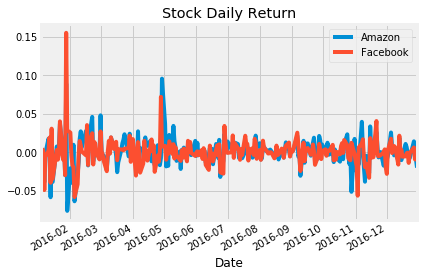

In [29]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot(title='Stock Daily Return');

# summarize the daily returns
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

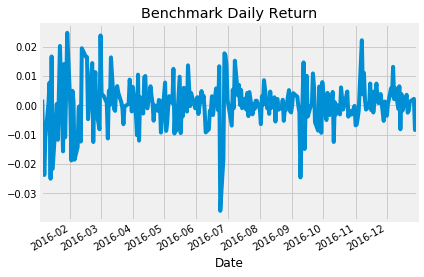

In [30]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(title='Benchmark Daily Return');

# summarize the daily returns
sp_returns.describe()

## Calculating Excess Returns
<p>Now we calculate the performance of the stocks versus the benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


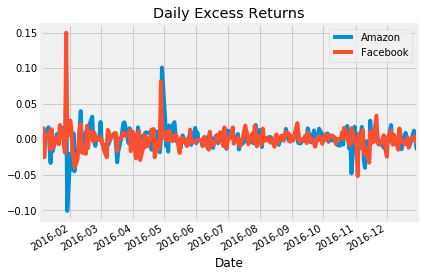

In [31]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot(title='Daily Excess Returns');

# summarize the excess_returns
excess_returns.describe()

## Step 1 of the Sharpe Ratio - Average Difference in Daily Stock Returns vs Benchmark
<p>The first step to calculating the Sharpe ratio is to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

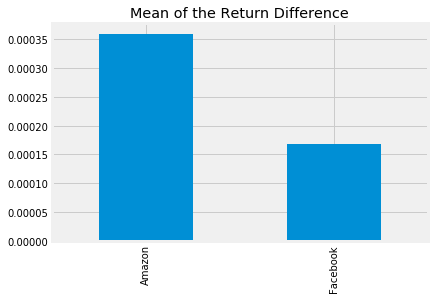

In [32]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title = 'Mean of the Return Difference');

## Step 2 of the Sharpe Ratio - Standard Deviation of the Return Difference
<p>Now we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the benchmark.</p>

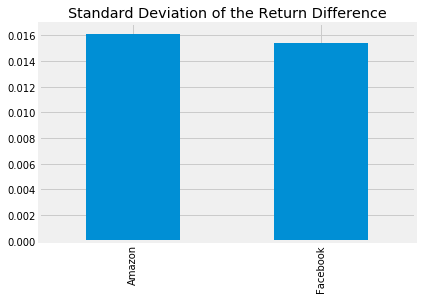

In [33]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference');

## The Sharpe Ratio
<p>Finally, we compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. 
    
The Sharpe ratio indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk. The ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods used (therefore √252 in our case - 5 days, 52 weeks, less a few holidays).

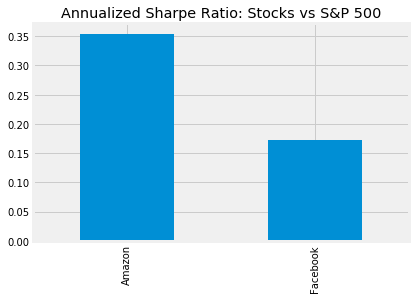

In [34]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500');

## Summary
<p>Given the two Sharpe ratios, we should buy <b>Amazon</b> stock.</p> 

<p>In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 benchmark for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>

<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>

<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>